<a href="https://colab.research.google.com/github/NsiriRoua/Computer_Vision/blob/main/ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

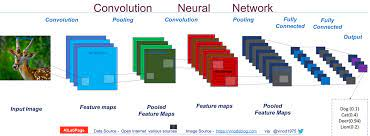



# **Import Resources**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 


# **Let's load our data**

In [ ]:
minst=tf.keras.datasets.mnist
(training_images,training_labels),(testing_images,testing_labels)=minst.load_data()

In [ ]:
print(training_images.shape)

In [ ]:
print(testing_images.shape)

# **Data Preprocessing**

In [ ]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
testing_images = testing_images.reshape(10000, 28, 28, 1)
testing_images=testing_images/255.0

# **Construction**

**Let's build the architecture**

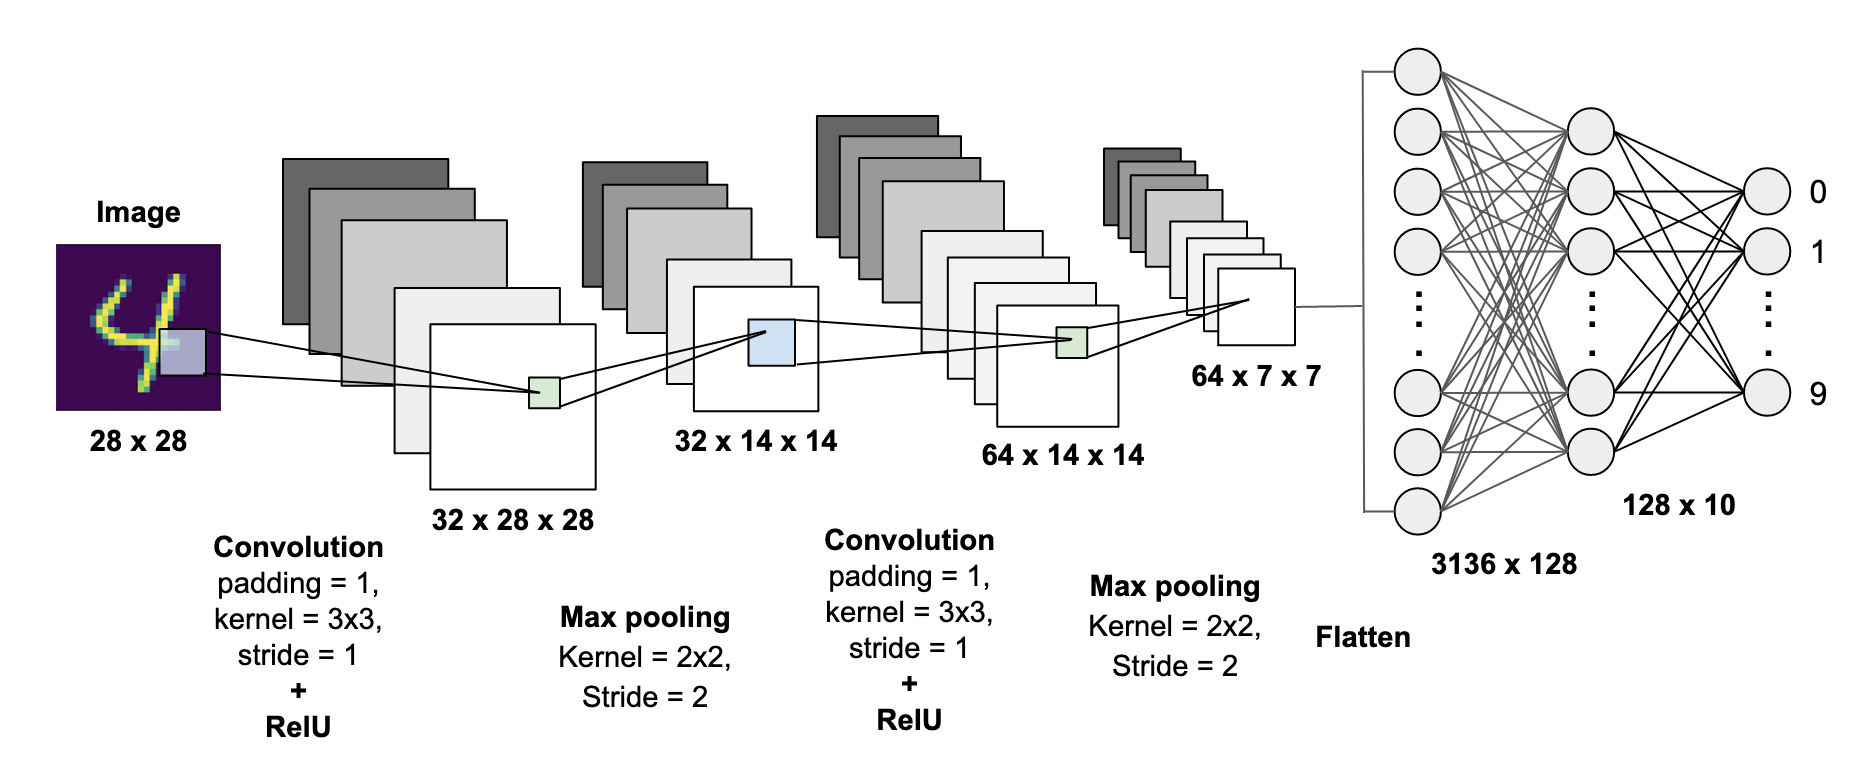

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(160, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

**Let's compile**

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Let's see the summary**

In [ ]:
model.summary()

In [ ]:
training_images.shape

**Let's fit**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=5)

In [ ]:
test_loss = model.evaluate(testing_images, testing_labels)

# **Visualizing the convolution and the pooling**

In [ ]:
print(testing_labels[:100])

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)